In [1]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

/home/kueen/anaconda3/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/kueen/anaconda3/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

/home/kueen/anaconda3/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/kueen/anaconda3/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


## 1. IMPORT NECESSARY LIBRARIES

In [3]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

/home/kueen/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# load the stock news data
stock_df = pd.read_csv("stock_sentiment.csv")

In [5]:
# Let's view the dataset 
stock_df

Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...          0
5787  #Gold prices slip below Rs 46,000 as #investor...          0
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]

In [6]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [7]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

**We can find the no of unique elements present in the 'sentiment' column by two different methods**

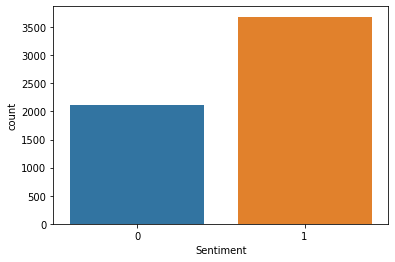

In [8]:
# using sns countplot
sns.countplot(stock_df['Sentiment'])
plt.show()

In [9]:
# using unique method
stock_df['Sentiment'].unique()

array([1, 0])

## 2. PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
text_with_punc = "!I love@ AI  &Machine, learning#"
text_without_punc = [char for char in text_with_punc if char not in string.punctuation]
text_without_punc = ''.join(text_without_punc)
text_without_punc

'I love AI  Machine learning'

In [12]:
# Let's define a function to remove punctuations
def remove_punc(text):
    text_without_punc = [char for char in text if char not in string.punctuation]
    text_without_punc = ''.join(text_without_punc)
    return text_without_punc

In [13]:
# Let's remove punctuations from our dataset 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [14]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [15]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [16]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**Remove punctuations using a different method**

In [17]:
stock_df['Text Without Punc'] = stock_df['Text']
for i, text in enumerate(stock_df['Text']):
    text_without_punc = [char for char in text if char not in string.punctuation]
    text_without_punc = ''.join(text_without_punc)
    stock_df['Text Without Punc'][i] = text_without_punc

/home/kueen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                                      Text Without Punc  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 4 columns]

In [19]:
stock_df.drop(columns = ['Text Without Punc'], axis = 1, inplace = True)
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

## 3. PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [20]:
# download stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/kueen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [22]:
# Remove stopwords and remove short words (less than 3 characters)
def preprocess(text):
    res = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >= 3:
            res.append(token)
    return res

In [23]:
# apply pre-processing to the text column
stock_df['Text Without Punc and Stopwords'] = stock_df['Text'].apply(preprocess)
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                        Text Without Punc and Stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, fea, geed, indicator, trades, ...  
2     [afraid, short, amzn, looking, like, near, mon...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, highs, still, key, fact...  

[5791 rows x 4 columns]

In [24]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [25]:
stock_df['Text Without Punc and Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

## 4. PLOT WORDCLOUD

In [26]:
stock_df['Text Joined'] = stock_df['Text Without Punc and Stopwords'].apply(lambda x: " ".join(x)) 
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                        Text Without Punc and Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, fea, geed, indicator, trades, ...   
2     [afraid, short, amzn, looking, like, near, mon...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, highs, still, key, fact...   

                                            Text Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1        movie return fea geed indicator trades awesome  
2     afraid short amzn looking like near monopoly e...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb highs still key factors dri...  

[5791 rows x 5 columns]

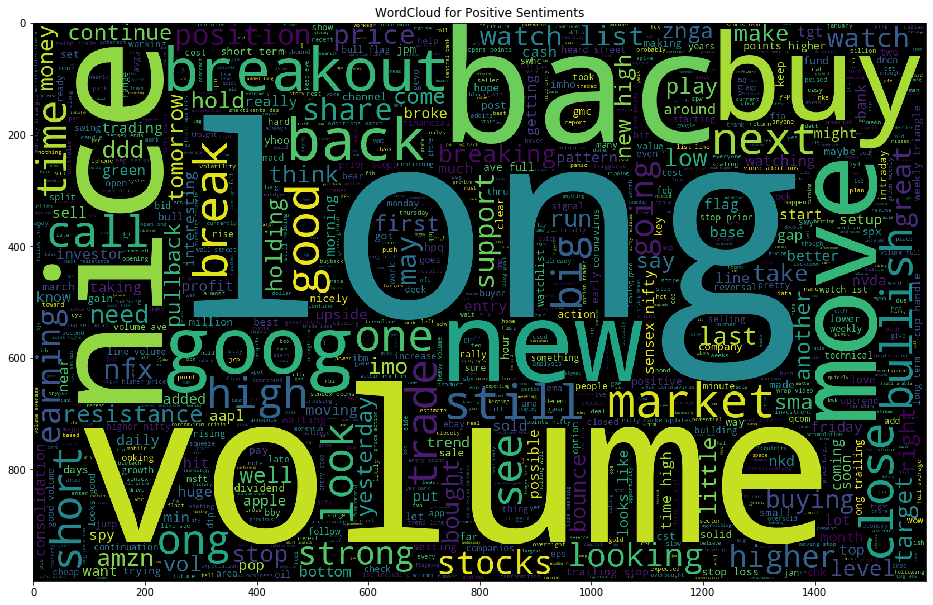

In [27]:
plt.figure(figsize = (16, 14))
wc = WordCloud(max_words = 1000, width = 1600, height = 1000).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Joined']))
plt.imshow(wc)
plt.title('WordCloud for Positive Sentiments')
plt.show()

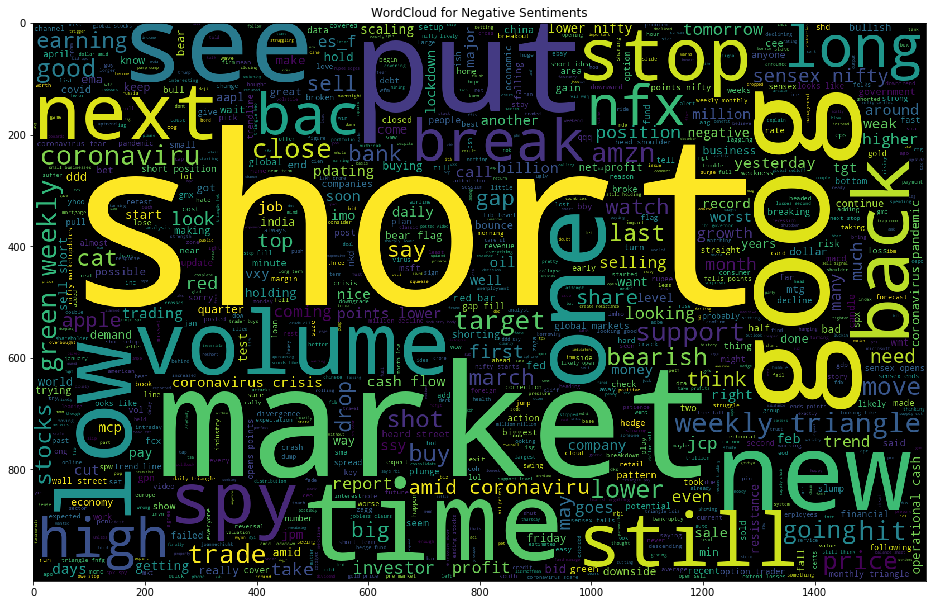

In [28]:
plt.figure(figsize = (16, 14))
wc = WordCloud(max_words = 1000, width = 1600, height = 1000).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Joined']))
plt.imshow(wc)
plt.title('WordCloud for Negative Sentiments')
plt.show()

## 5. VISUALIZE CLEANED DATASETS

In [29]:
nltk.download('punkt')
nltk.word_tokenize(stock_df['Text Joined'][0])

[nltk_data] Downloading package punkt to /home/kueen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [30]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated

max_len = -1

for text in stock_df['Text Joined']:
    tokens = nltk.word_tokenize(text)
    curr = len(tokens)
    if curr > max_len:
        max_len = curr
        
max_len

20

In [31]:
tweets_len = [len(nltk.word_tokenize(text)) for text in stock_df['Text Joined']]
tweets_len

[14,
 7,
 10,
 1,
 0,
 1,
 10,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 4,
 2,
 5,
 3,
 9,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 10,
 8,
 4,
 11,
 8,
 7,
 7,
 11,
 10,
 10,
 8,
 2,
 14,
 11,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 12,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 12,
 16,
 6,
 12,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 17,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 17,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 2,
 3,
 10,
 10,
 8,
 6,
 7,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 8,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 8,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 6,
 3,
 4,
 10,
 5,
 5,
 10,
 6,
 16,
 9,
 6,
 4,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 5,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 12,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 8,
 11,
 13,
 10,
 7,
 12,
 7,
 12,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 9,
 15,
 12,


In [32]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_len, nbins = 50)
fig.show()

**Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

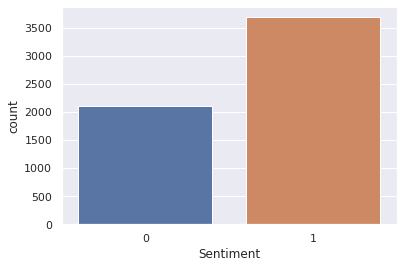

In [33]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=stock_df)

##  6. PREPARE THE DATA BY TOKENIZING AND PADDING

In [34]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text Without Punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                        Text Without Punc and Stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, fea, geed, indicator, trades, ...   
2     [afraid, short, amzn, looking, like, near, mon...   
3                                                [mnta]   
4                                                    []   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, investors, book, profits,...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, highs, still, key, fact...   

                                            Text Joined  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1        movie return fea geed indicator trades awesome  
2     afraid short amzn looking like near monopoly e...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb highs still key factors dri...  

[5791 rows x 5 columns]

In [35]:
# Obtain the total words present in the dataset

total_words = []
for text in stock_df['Text Joined']:
    total_words.extend(nltk.word_tokenize(text))

In [36]:
total_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'fea',
 'geed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'near',
 'monopoly',
 'ebooks',
 'infrastructure',
 'service',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'short',
 'term',
 'correction',
 'med',
 'term',
 'downtrend',
 'monday',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'usually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamco',
 'arr

In [37]:
# Obtain the total number of unique words
total_num_words = len(list(set(total_words)))
total_num_words

8812

In [38]:
# split the data into test and train 

from sklearn.model_selection import train_test_split

x = stock_df['Text Without Punc and Stopwords']
y = stock_df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [39]:
x_train.shape

(4053,)

In [40]:
x_test.shape

(1738,)

In [41]:
x_train

1317    [amd, bailed, dropped, thought, good, may, reb...
1064                                      [kbh, breaking]
5459    [amazon, add, jobs, amid, coronavirus, pandemi...
3941    [asgn, made, clear, outset, invalidation, reso...
4995    [brian_mcgill, billion, small, business, loans...
                              ...                        
3587                                          [cost, min]
2413    [bac, back, run, area, consolidate, sell, prof...
863                    [csn, target, remains, data, news]
2902            [heavily, betting, syx, monday, earnings]
2644                                  [mge, buying, long]
Name: Text Without Punc and Stopwords, Length: 4053, dtype: object

In [42]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words

tokenizer = Tokenizer(num_words = total_num_words)
tokenizer.fit_on_texts(x_train.values)

train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [43]:
train_sequences

[[1269, 3067, 907, 908, 5, 54, 3068, 42, 765, 530, 126],
 [483, 82],
 [607, 206, 416, 63, 20, 207, 3069],
 [1079, 187, 484, 3070, 3071, 1270, 215, 1271, 1570, 1571],
 [3072, 199, 138, 354, 766, 333, 531, 138, 608, 3073, 3074],
 [29, 485, 51, 16, 46, 31, 240, 3075],
 [1080, 87, 609, 2068, 188, 909, 2069, 3076, 910, 767, 610],
 [296, 3077, 101, 2070, 388, 227, 120, 178, 52, 611, 669, 3078, 768, 670, 911],
 [32, 43, 5, 671, 1, 44],
 [7, 417, 121, 27],
 [532, 912, 1572, 30],
 [297, 913, 70, 1081, 486, 96],
 [67, 3079, 2071, 612, 3080, 769, 127, 216, 3081, 1082],
 [2072,
  487,
  87,
  488,
  1573,
  3082,
  3083,
  3084,
  3085,
  272,
  1272,
  1273,
  3086,
  3087],
 [914, 1574, 1083, 3088, 770],
 [298, 228],
 [418, 1, 771],
 [217, 1575, 105, 15, 1],
 [334, 1576, 2073, 2074, 489, 1084, 1274],
 [128, 273, 3089, 915, 1085, 916, 419, 101, 613, 159],
 [299, 42, 1086, 200, 102, 389, 614, 3090, 2, 533, 1087, 72, 56, 22],
 [29, 3091, 51, 34, 2075, 46, 615, 452, 355, 24, 335, 117, 3092],
 [453, 

In [44]:
test_sequences

[[22, 1023, 1773, 77, 6254, 1167, 1156, 6962],
 [45, 377, 70, 310, 92, 379],
 [5688, 994, 1218],
 [1974, 1975, 6, 337, 504, 24, 5, 1291, 17, 59],
 [29, 1114, 51, 63, 790, 130, 123, 46],
 [160, 522, 240],
 [85, 259, 4740, 1824],
 [29, 485, 51, 41, 34, 2639, 46, 234, 63, 20, 1127, 29, 34, 346],
 [85, 259, 2140, 176, 2667, 239, 801, 656, 3681, 5669, 214, 332, 128],
 [187, 934, 705, 78],
 [2283, 2839, 342, 707, 1912, 27, 57, 15, 38],
 [268, 601, 1575, 56, 1784, 432, 4, 516, 2060, 1934],
 [465, 702, 562, 125, 64, 49, 4, 5843, 69, 21],
 [9, 330, 5, 744, 2842, 626, 32, 55],
 [344, 145],
 [66, 162, 218, 18, 371, 319, 371, 2002, 928],
 [200, 384, 9],
 [3131],
 [112, 2437, 286, 17, 190, 4682, 2437, 286, 995, 4988, 1613],
 [1653, 1636, 12, 56, 67, 699],
 [231, 397, 75, 36, 30, 453, 252, 5, 2],
 [82, 64, 12, 19, 47],
 [2838, 2296, 916, 2339, 747, 2048, 2860, 5859, 747],
 [9, 74, 2477, 4028, 33, 5, 48, 53, 143, 1738, 4, 564, 21],
 [29, 485, 51, 41, 452, 326, 63, 20, 250, 34, 5593, 29, 34, 346],
 [1

In [45]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen=15)
padded_test = pad_sequences(test_sequences, maxlen=15)

In [46]:
for i, doc in enumerate(padded_train[:3]):
    print(doc)

[   0    0    0    0 1269 3067  907  908    5   54 3068   42  765  530
  126]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 483  82]
[   0    0    0    0    0    0    0    0  607  206  416   63   20  207
 3069]


In [47]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [48]:
y_train_cat.shape

(4053, 2)

In [49]:
y_test_cat.shape

(1738, 2)

In [50]:
y_test_cat

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## 7. BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [51]:
# Sequential Model

model = Sequential()

model.add(Embedding(total_num_words, output_dim=512))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4511744   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,332,354
Trainable params: 5,332,354
Non-trainable params: 0
_________________________________________________________________


In [52]:
# train the model
model.fit(padded_train, y_train_cat, batch_size=32, validation_split=0.2, epochs=5)

Epoch 1/5
102/102 [==============================] - 12s 97ms/step - loss: 0.5815 - acc: 0.6915 - val_loss: 0.5011 - val_acc: 0.7571
Epoch 2/5
102/102 [==============================] - 9s 93ms/step - loss: 0.2691 - acc: 0.8908 - val_loss: 0.5452 - val_acc: 0.7620
Epoch 3/5
102/102 [==============================] - 10s 93ms/step - loss: 0.1242 - acc: 0.9540 - val_loss: 0.7638 - val_acc: 0.7645
Epoch 4/5
102/102 [==============================] - 9s 93ms/step - loss: 0.0548 - acc: 0.9800 - val_loss: 1.2349 - val_acc: 0.7534
Epoch 5/5
102/102 [==============================] - 9s 93ms/step - loss: 0.0386 - acc: 0.9864 - val_loss: 1.1791 - val_acc: 0.7411


## 8. ASSESS TRAINED MODEL PERFORMANCE

In [53]:
# make prediction
pred = model.predict(padded_test)
prediction = []
for i in pred:
    prediction.append(np.argmax(i))
prediction

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [54]:
# list containing original values
original = []
for i in y_test_cat:
    original.append(np.argmax(i))
original

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,


In [55]:
# acuracy score on text data
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(original, prediction)
accuracy

0.737054085155351

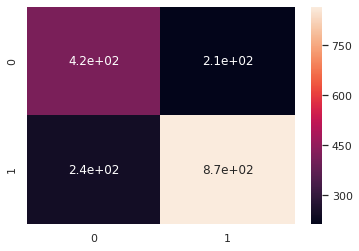

In [56]:
# Plot the confusion matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True)
plt.show()